In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
#to check outliers
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

In [5]:
pred_outlier=clf.predict(df)

In [6]:
df['outlier']=clf.predict(df)

In [7]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,outlier
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1


In [8]:
df[df['outlier']==-1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,outlier
106,1.53125,10.73,0.00,2.1,69.81,0.58,13.30,3.15,0.28,2,-1
107,1.53393,12.30,0.00,1.0,70.16,0.12,16.19,0.00,0.24,2,-1
163,1.51514,14.01,2.68,3.5,69.89,1.68,5.87,2.20,0.00,5,-1


In [9]:
data=df.drop(df.index[[106,107,163]],axis=0).reset_index()
data

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,outlier
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
206,209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1
207,210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1
208,211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1
209,212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1


In [10]:
data=data.drop(['index','outlier'],axis=1)

In [11]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
206,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
207,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
208,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
209,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [12]:
x=data.iloc[:,0:9]
y=data.iloc[:,9]

In [13]:
from sklearn.preprocessing import MinMaxScaler
MM= MinMaxScaler()
MM_X = MM.fit_transform(x)

In [14]:
#data partition
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(MM_X,y,test_size=0.3)


In [15]:
#model fitting KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier



In [16]:
kfold = KFold(n_splits=38)

In [17]:
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model, MM_X, y, cv=kfold)
results

array([0.33333333, 1.        , 1.        , 0.83333333, 1.        ,
       0.66666667, 1.        , 0.66666667, 0.83333333, 0.83333333,
       1.        , 1.        , 1.        , 0.5       , 0.83333333,
       0.66666667, 0.16666667, 0.16666667, 0.5       , 0.83333333,
       0.5       , 0.4       , 0.6       , 0.8       , 0.8       ,
       0.        , 0.        , 0.        , 0.4       , 0.2       ,
       0.        , 0.2       , 0.2       , 0.8       , 1.        ,
       0.8       , 1.        , 1.        ])

In [18]:
print(results.mean())

0.6192982456140351


In [19]:
model.fit(MM_X,y)

KNeighborsClassifier(n_neighbors=3)

In [20]:
Pred=model.predict(MM_X)

In [21]:
model.score(MM_X,y)

0.8199052132701422

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y,Pred))

              precision    recall  f1-score   support

           1       0.78      0.90      0.83        70
           2       0.82      0.84      0.83        74
           3       0.67      0.35      0.46        17
           5       0.83      0.83      0.83        12
           6       0.88      0.78      0.82         9
           7       1.00      0.86      0.93        29

    accuracy                           0.82       211
   macro avg       0.83      0.76      0.78       211
weighted avg       0.82      0.82      0.81       211



In [23]:
#Grid Search CV for best value of K(n_neighbors)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [25]:
n_neighbors = np.array(range(1,81))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])}

In [26]:
KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN, param_grid=param_grid,cv=38)
grid.fit(MM_X, y)

GridSearchCV(cv=38, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])})

In [27]:
print(grid.best_score_)
print(grid.best_params_)

0.6982456140350879
{'n_neighbors': 3}


In [28]:
#Visualizing the CV results

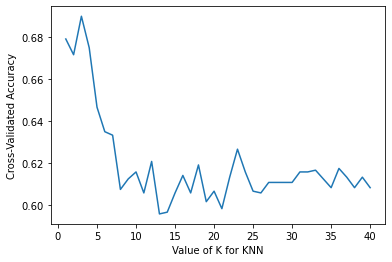

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
#'''use iteration to caclulator different k in models, 
#then return the average accuracy based on the cross validation'''
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, MM_X, y, cv=40)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [30]:
#using train-test split
x_train,x_test,y_train,y_test=train_test_split(MM_X,y,test_size=0.3,random_state=0)
model2=KNeighborsClassifier(n_neighbors=3)

In [31]:
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
pred1=model2.predict(x_test)

In [33]:
model2.score(x_test,y_test)

0.671875

In [34]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred1)
print('Accuracy=',acc)
print(classification_report(y_test,pred1))

Accuracy= 0.671875
              precision    recall  f1-score   support

           1       0.55      0.81      0.65        21
           2       0.70      0.67      0.68        24
           3       0.00      0.00      0.00         7
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      0.88      0.93         8

    accuracy                           0.67        64
   macro avg       0.71      0.64      0.66        64
weighted avg       0.63      0.67      0.64        64



In [35]:
pd.DataFrame({'ytest':y_test,'y_Pred':pred1})

,ytest,y_Pred
173,6,6
74,2,2
12,1,2
5,1,2
55,1,2
...,...,...
112,2,2
13,1,1
80,2,2
116,2,2
